In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression


In [2]:
data=pd.read_csv("HR_comma_sep.csv")

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

<AxesSubplot:xlabel='left', ylabel='count'>

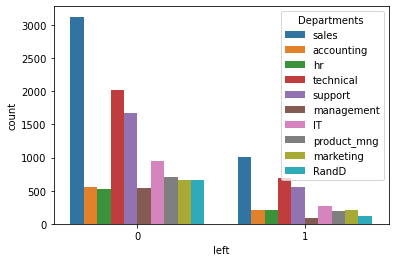

In [5]:
sns.countplot(x='left',hue='Departments ',data=data)

[Text(0, 0, 'low'), Text(1, 0, 'medium'), Text(2, 0, 'high')]

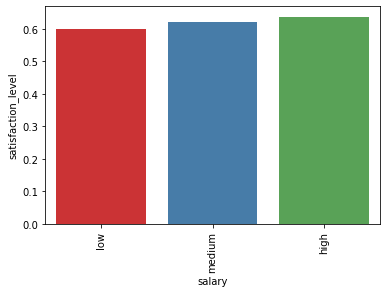

In [6]:
chart = sns.barplot(x='salary', y= 'satisfaction_level', data=data, palette='Set1', ci=None) 
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [7]:
#converting string value into integers to apply algorithm, becausde they apply only on numbers
sal=pd.get_dummies(data['salary'],drop_first=True)

In [8]:
sal

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [9]:
#so here if low=0, medium=0, thuis means it is high

In [10]:
dep=pd.get_dummies(data['Departments '],drop_first=True)
dep

,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,1,0


In [11]:
data.drop(['Departments ','salary'],axis=1,inplace=True)

In [12]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [13]:
#dropped,....now we have to concatenate

In [14]:
data=pd.concat([data,sal,dep],axis=1)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,low,medium,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


## Scaling of Data

In [15]:
#for this we have to import formk sklearn
from sklearn.preprocessing import StandardScaler

#usedn to fit the data value into same range
scaler=StandardScaler()
scaler.fit(data)

StandardScaler()

In [16]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,low,medium,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,1,0,0,0,0,0,0,0,0,1,0


## Splitting Of Data

In [17]:
x=data.drop('left', axis=1).values
x

array([[0.38, 0.53, 2.  , ..., 1.  , 0.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 1.  , 0.  , 0.  ],
       [0.11, 0.88, 7.  , ..., 1.  , 0.  , 0.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 1.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 1.  , 0.  ]])

In [18]:
y=data['left'].values
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#random state to prserve the order after splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

# Logistic Regression

In [21]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [22]:
y_pred=reg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
y_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [24]:
#by giving any value in random state we are telling to hold the order
model=LogisticRegression(solver='liblinear',random_state=0).fit(x,y)

In [25]:
model.predict(x)

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

## Confussion Matrix

In [26]:
#confusion matrix is used to compare the classifiication algorithm
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[3125,  291],
       [ 646,  438]], dtype=int64)

In [27]:
#so by using this algorithm we get the values 649 +294 value predicted wron

In [28]:
accuracy_score(y_test,y_pred)

0.7917777777777778

In [29]:
accuracy_score1=accuracy_score(y_test, y_pred)
accuracy_score1

0.7917777777777778

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [31]:
#creating object
dc=DecisionTreeClassifier(random_state=0)

In [32]:
dc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [33]:
y_pred2=dc.predict(x_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [34]:
y_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm2=confusion_matrix(y_test,y_pred2)
cm2

array([[3367,   49],
       [  41, 1043]], dtype=int64)

In [36]:
accuracy_score2=accuracy_score(y_test, y_pred2)
accuracy_score2

0.98

In [37]:
#visualizing decision tree

df=dc.fit(x_test,y_pred2)
plt.figure(figsize=(15,7))

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

[Text(154.44, 211.4, 'X[0] <= 0.465\ngini = 0.368\nsamples = 4500\nvalue = [3408, 1092]'),
 Text(58.792500000000004, 199.32, 'X[2] <= 2.5\ngini = 0.477\nsamples = 1272\nvalue = [500, 772]'),
 Text(15.66, 187.24, 'X[1] <= 0.575\ngini = 0.211\nsamples = 501\nvalue = [60, 441]'),
 Text(7.5600000000000005, 175.16, 'X[1] <= 0.44\ngini = 0.102\nsamples = 464\nvalue = [25, 439]'),
 Text(5.4, 163.07999999999998, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(9.72, 163.07999999999998, 'X[0] <= 0.34\ngini = 0.048\nsamples = 450\nvalue = [11, 439]'),
 Text(4.32, 151.0, 'X[4] <= 4.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(2.16, 138.92000000000002, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(6.48, 138.92000000000002, 'X[15] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(4.32, 126.84, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(8.64, 126.84, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(15.120000000000001, 151.0, 'X[3] <= 125.0\ngini = 0.022\nsamples = 443\

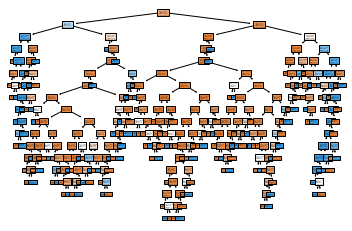

In [38]:
plot_tree(df, filled=True)

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
#estimator is nothing but how many differnt models we want, how many diff decisoin trees we want

classifier=RandomForestClassifier(n_estimators=20, criterion='entropy' , random_state=0)

In [43]:
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [44]:
y_pred3=classifier.predict(x_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [45]:
y_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [46]:
cm3=confusion_matrix(y_test,y_pred3)
cm3

array([[3407,    9],
       [  45, 1039]], dtype=int64)

In [47]:
accuracy_score3=accuracy_score(y_test, y_pred3)
accuracy_score3

0.988

In [48]:
#if we dont give criterition, then accuracy will decrease
#check it by removing criterion in object creation

# KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
classifier=KNeighborsClassifier(n_neighbors=5)

In [51]:
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [52]:
y_pred4=classifier.predict(x_test)
y_pred4

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [53]:
y_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [54]:
cm4=confusion_matrix(y_test,y_pred4)
cm4

array([[3216,  200],
       [  87,  997]], dtype=int64)

In [55]:
accuracy_score4=accuracy_score(y_test, y_pred4)
accuracy_score4

0.9362222222222222

In [56]:
#here accuracy depends upon k value
#plotting graph with different value of k

error=[]
for i in  range(1,40) :
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    Ypred_i=knn.predict(x_test)
    error.append(np.mean(Ypred_i != y_test))                              #mean error appending for every value of k
    #we are appending onhly for that value whjich doesnt match

Text(0, 0.5, 'Mean Error')

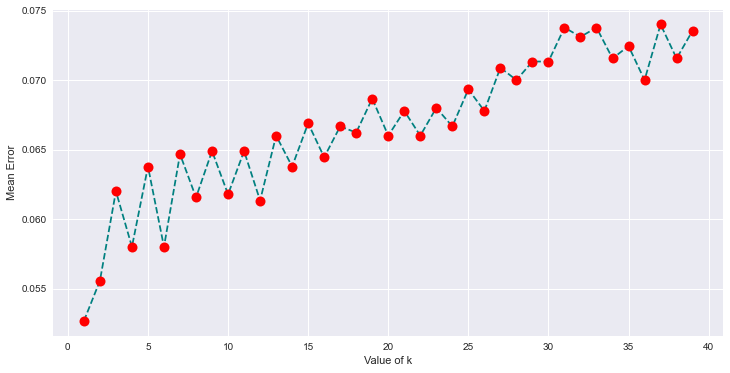

In [57]:
plt.style.use('seaborn')
plt.figure(figsize=(12,6))   #used to define size of figure
plt.plot(range(1,40),error, color='teal', linestyle='dashed', marker='o', markerfacecolor='red',markersize=10)      
#k value on x axis and error value on y axis
plt.xlabel("Value of k")
plt.ylabel("Mean Error")

Text(0.5, 1.0, 'Accuracy score of various Algo')

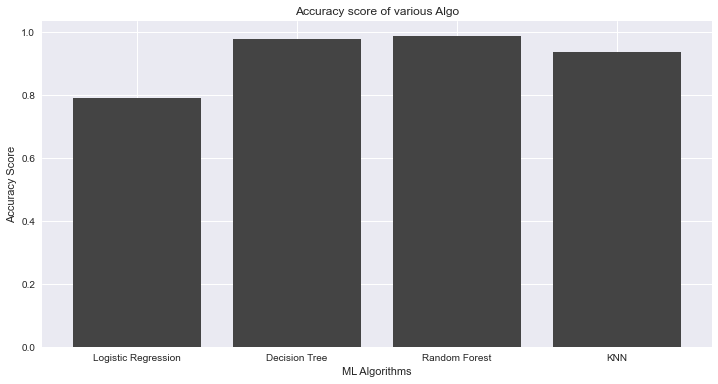

In [58]:
plt.figure(figsize=(12,6)) 
x=[accuracy_score1,accuracy_score2,accuracy_score3,accuracy_score4]
y=['Logistic Regression','Decision Tree','Random Forest','KNN']

plt.bar(y,x, color="#444444")
plt.xlabel('ML Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Accuracy score of various Algo')

## Since, the Random Forest Classification is showing  maximum Accuracy Score among all the classification algorithms we have used here. Hence, Random Forest Classification fits best for our model..